In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
reviews = pd.read_csv("DisneylandReviews.csv", encoding='latin1')

In [21]:
reviews.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

In [22]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [5]:
reviews["Year_Month"] = pd.to_datetime(reviews["Year_Month"], errors='coerce')

In [6]:
reviews["Year"] = reviews["Year_Month"].dt.year
reviews["Month"] = reviews["Year_Month"].dt.month

In [7]:
reviews.isnull().sum()/len(reviews)

Review_ID            0.000000
Rating               0.000000
Year_Month           0.061258
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.000000
Year                 0.061258
Month                0.061258
dtype: float64

In [8]:
reviews.dropna(inplace=True)

In [9]:
reviews["Review_ID"].value_counts()

121570980    2
121615246    2
121586148    2
121580686    2
121578357    2
            ..
444105514    1
444045161    1
444044561    1
443909273    1
91827418     1
Name: Review_ID, Length: 40023, dtype: int64

In [10]:
reviews.drop_duplicates(subset="Review_ID",inplace=True, keep="first")

In [11]:
reviews.shape

(40023, 8)

The year has the maximum reviews

In [19]:
reviews["Year"].value_counts().sort_values(ascending=False)

2015.0    6979
2016.0    6599
2014.0    5300
2017.0    5195
2013.0    4709
2012.0    4339
2018.0    3997
2011.0    1976
2019.0     786
2010.0     143
Name: Year, dtype: int64

The month has the maximum reviews

In [20]:
reviews["Month"].value_counts().sort_values(ascending=False)

8.0     3994
7.0     3876
12.0    3870
10.0    3764
6.0     3588
4.0     3476
5.0     3436
9.0     3229
3.0     3132
11.0    2684
1.0     2515
2.0     2459
Name: Month, dtype: int64

Top 10 country that people come from to visit and give the reviews

In [39]:
top_10_locations = reviews["Reviewer_Location"].value_counts().sort_values(ascending=False)[:10]
top_10_locations

United States     14551
United Kingdom     9751
Australia          4679
Canada             2235
India              1511
Philippines        1070
Singapore          1037
New Zealand         756
Malaysia            588
Hong Kong           554
Name: Reviewer_Location, dtype: int64

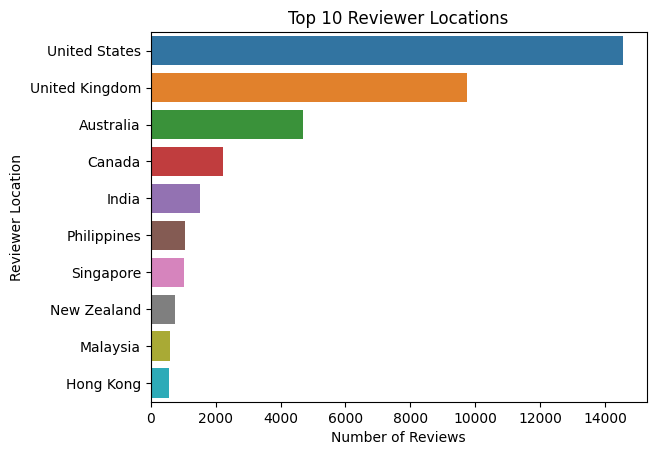

In [40]:
from pylab import savefig

graph = sns.barplot(y=top_10_locations.index, x=top_10_locations.values)
graph.set_xlabel('Number of Reviews')
graph.set_ylabel('Reviewer Location')
graph.set_title('Top 10 Reviewer Locations')

figure = graph.get_figure()
figure.savefig('top_10_reviewer_locations.png', dpi=300, bbox_inches='tight')


Separate Disneyland Branch

In [23]:
reviews['Location'] = reviews.Branch.str[11:]
reviews.drop(columns="Branch", inplace=True)
reviews.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text  Location  
0  If you've ever been to Disneyland anywhere you...  HongKong  
1  Its been a while since d last time we visit HK...  HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  HongKong  
3  HK Disneyland is a great compact park. Unfortu...  HongKong  
4  the location is not in the city, took around 1...  HongKong

The number of reviews for each branch of Disneyland

In [24]:
reviews['Location'].value_counts()

California    19406
Paris         13630
HongKong       9620
Name: Location, dtype: int64

In [25]:
disney_ca = reviews.loc[reviews['Location'] == "California"]
disney_ca.to_csv("Disney-Anaheim.csv")

disney_fr = reviews.loc[reviews['Location'] == "Paris"]
disney_fr.to_csv("Disney-Paris.csv")

disney_hk = reviews.loc[reviews['Location'] == "HongKong"]
disney_hk.to_csv("Disney-HK.csv")

### Average Ratings from each location

In [27]:
np.mean(disney_ca['Rating'])

4.405338555086056

In [28]:
np.mean(disney_fr['Rating'])

3.96008804108584

In [29]:
np.mean(disney_hk['Rating'])

4.204158004158004

Distribution of reviews

In [23]:
reviews["Rating"].value_counts().sort_values()

1     1338
2     1929
3     4778
4    10079
5    21899
Name: Rating, dtype: int64

Overall rating (Mean rating)

In [24]:
reviews["Rating"].mean()

4.231092122029833

Top 5 countries that gave the best rating to Disneyland

In [25]:
reviews.groupby("Reviewer_Location")["Rating"].mean().sort_values(ascending=False)[:5]

Reviewer_Location
Libya                    5.0
Caribbean Netherlands    5.0
Cuba                     5.0
Curaçao                  5.0
Ethiopia                 5.0
Name: Rating, dtype: float64

Top 5 countries that gave the worst rating to Disneyland

In [26]:
reviews.groupby("Reviewer_Location")["Rating"].mean().sort_values()[:5]

Reviewer_Location
Andorra                     2.000000
Turks and Caicos Islands    2.000000
South Sudan                 2.000000
Suriname                    2.000000
Ecuador                     2.333333
Name: Rating, dtype: float64

Disney Branch that the most customer satisfied 

In [27]:
reviews.groupby("Branch")["Rating"].mean()

Branch
Disneyland_California    4.413717
Disneyland_HongKong      4.215568
Disneyland_Paris         3.980462
Name: Rating, dtype: float64

Rating distribution of each branch and inferred from the distribution

In [28]:
reviews[reviews["Branch"]=="Disneyland_California"]["Rating"].value_counts()

5    11799
4     3711
3     1551
2      685
1      450
Name: Rating, dtype: int64

In [29]:
reviews[reviews["Branch"]=="Disneyland_California"]["Rating"].value_counts()*100/len(reviews[reviews["Branch"]=="Disneyland_California"])

5    64.843922
4    20.394592
3     8.523851
2     3.764564
1     2.473071
Name: Rating, dtype: float64

In [30]:
reviews[reviews["Branch"]=="Disneyland_HongKong"]["Rating"].value_counts()*100/len(reviews[reviews["Branch"]=="Disneyland_HongKong"])

5    47.438143
4    33.369827
3    14.166849
2     3.361069
1     1.664112
Name: Rating, dtype: float64

In [31]:
reviews[reviews["Branch"]=="Disneyland_Paris"]["Rating"].value_counts()*100/len(reviews[reviews["Branch"]=="Disneyland_Paris"])

5    45.434491
4    26.156149
3    15.228866
2     7.382022
1     5.798472
Name: Rating, dtype: float64

## Word Cloud

In [32]:
data=reviews[['Review_Text', "Rating"]]

In [33]:
data

Review_Text  Rating
0      If you've ever been to Disneyland anywhere you...       4
1      Its been a while since d last time we visit HK...       4
2      Thanks God it wasn   t too hot or too humid wh...       4
3      HK Disneyland is a great compact park. Unfortu...       4
4      the location is not in the city, took around 1...       4
...                                                  ...     ...
42113  Although our pick up was prompt the taxi drive...       4
42114  Just returned from a 4 days family trip to Dis...       4
42115  We spent the 20 Dec 2010 in the Disney park an...       1
42116  Well I was really looking forward to this trip...       2
42117  If staying at a Disney hotel make good use of ...       5

[40023 rows x 2 columns]

In [34]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

In [35]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [36]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print("Number of Stopwords in Spacy: ",len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print("Number of Stopwords in NLTK: ",len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print("Combined Stopwords: ",len(Stopwords))

Number of Stopwords in Spacy:  326
Number of Stopwords in NLTK:  179
Combined Stopwords:  382


In [37]:
def clean_text(text):
    
    global Stopwords
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('/\b\S\s\b/',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [40]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /Users/miemie/nltk_data...


True

In [41]:
data["Review_Text"] = data["Review_Text"].apply(clean_text)

/var/folders/pj/239qyfb12rj5dq47_ghtm37w0000gn/T/ipykernel_42307/2790172322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Review_Text"] = data["Review_Text"].apply(clean_text)


In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# WordCloud for Rating 5

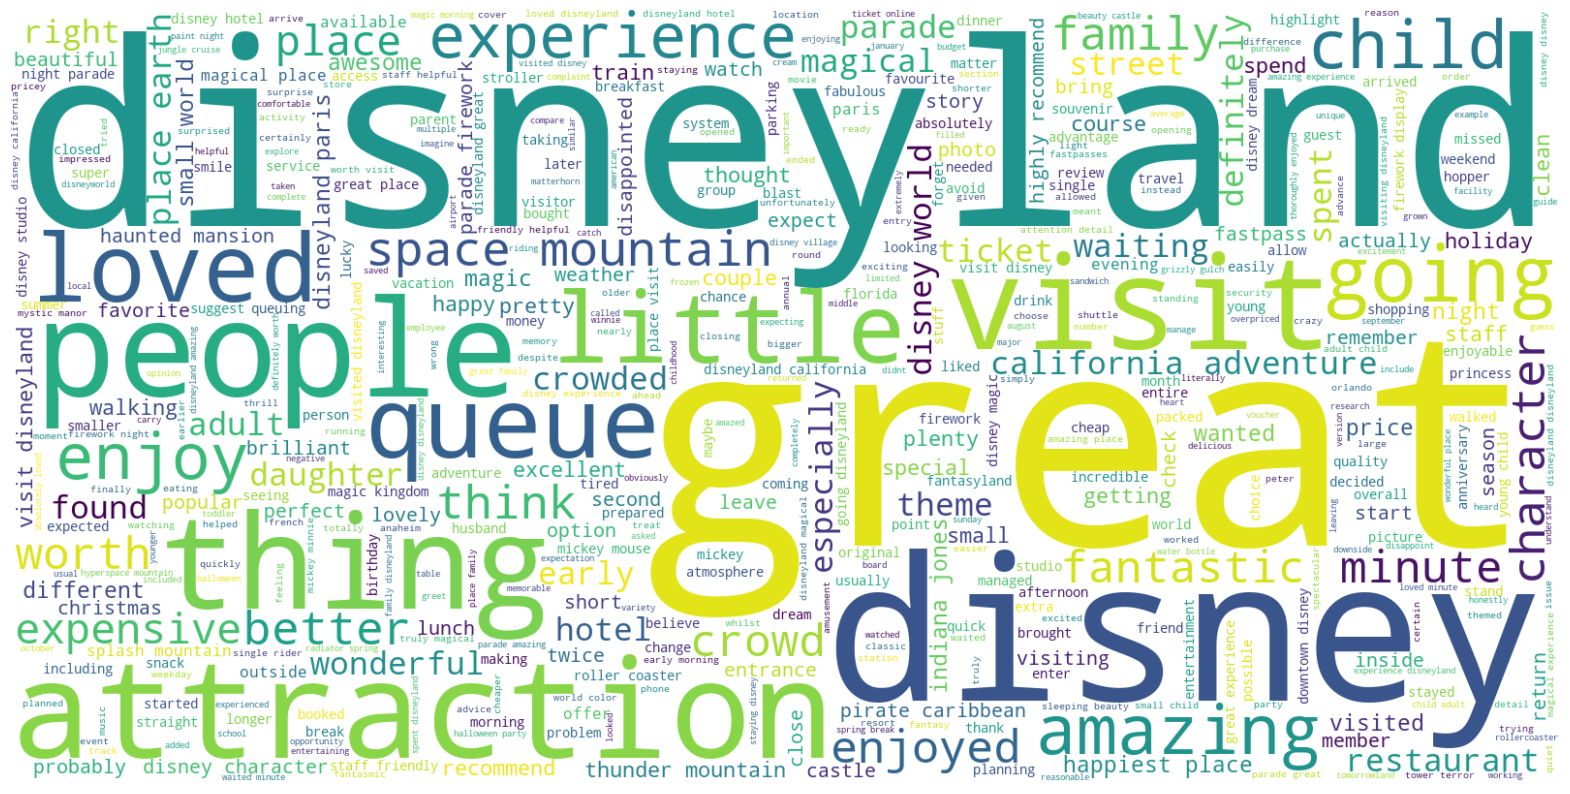

In [43]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5,background_color='white').generate(" ".join(data[data.Rating == 5].Review_Text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

# WordCloud for Rating 4

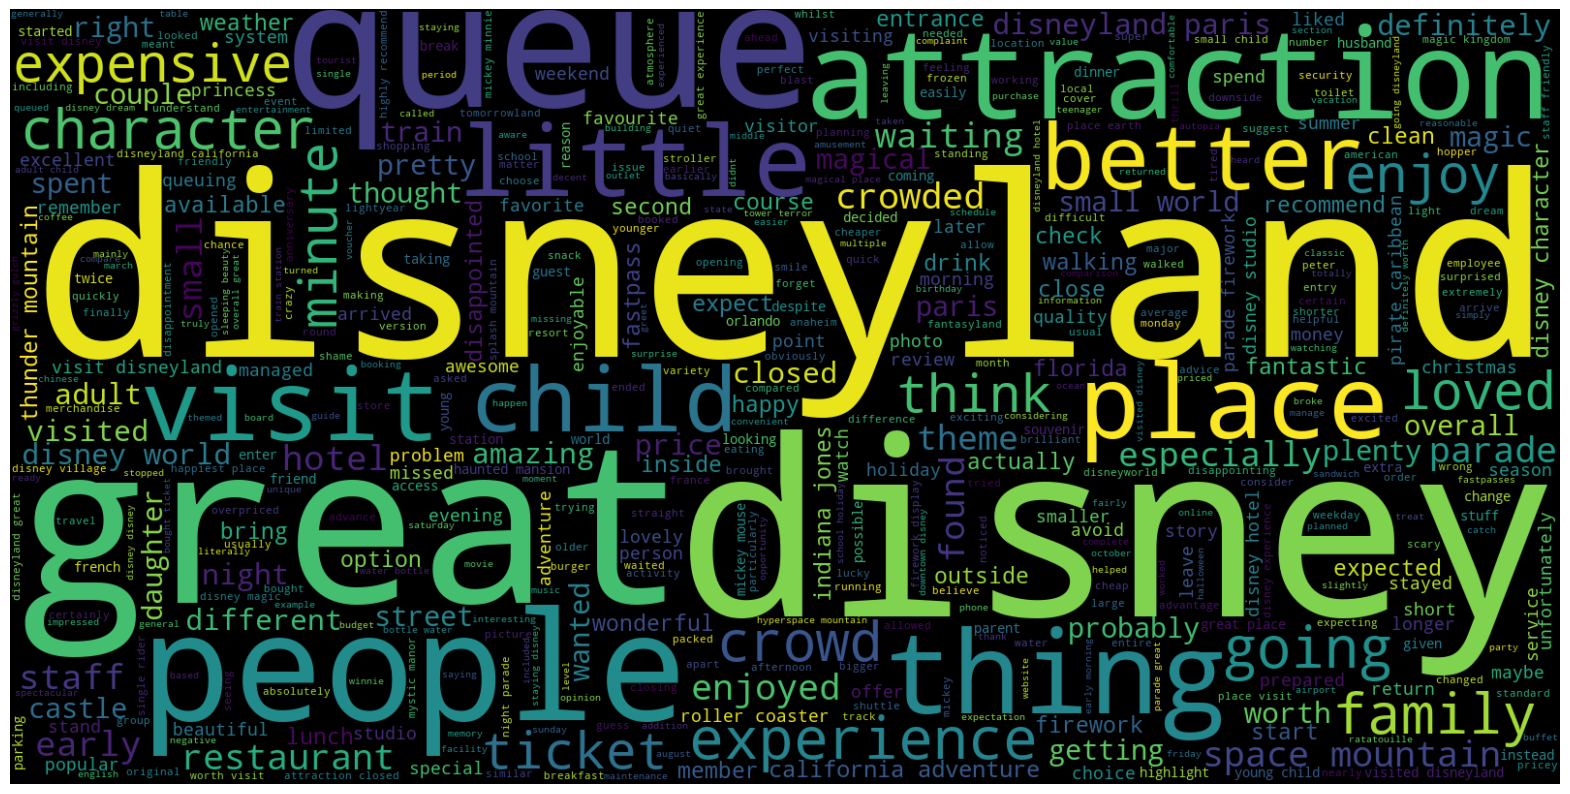

In [44]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5).generate(" ".join(data[data.Rating == 4].Review_Text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

# WordCloud for Rating 3

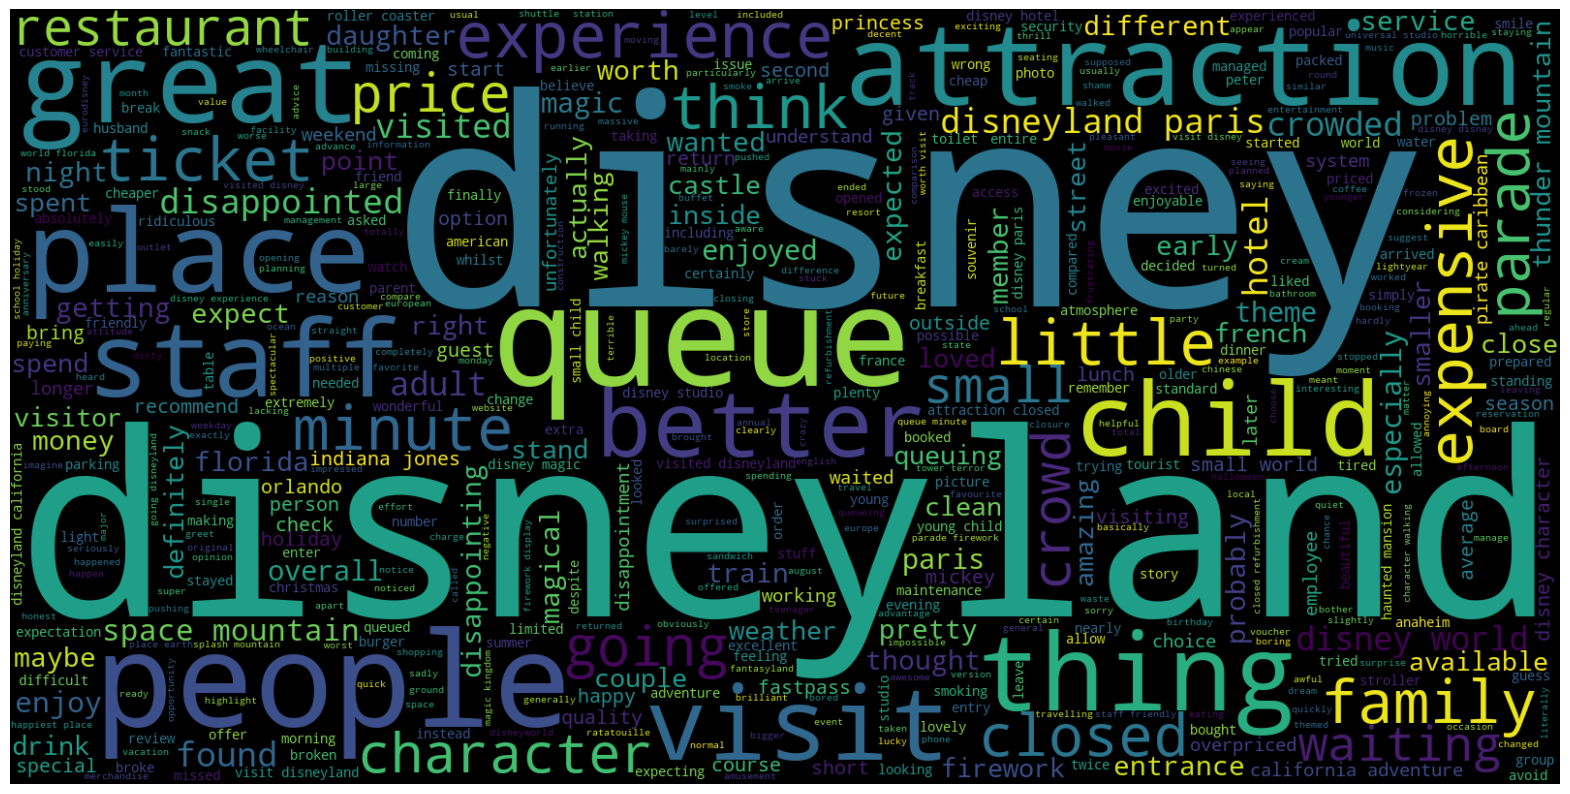

In [45]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5).generate(" ".join(data[data.Rating == 3].Review_Text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

# WordCloud for Rating 2

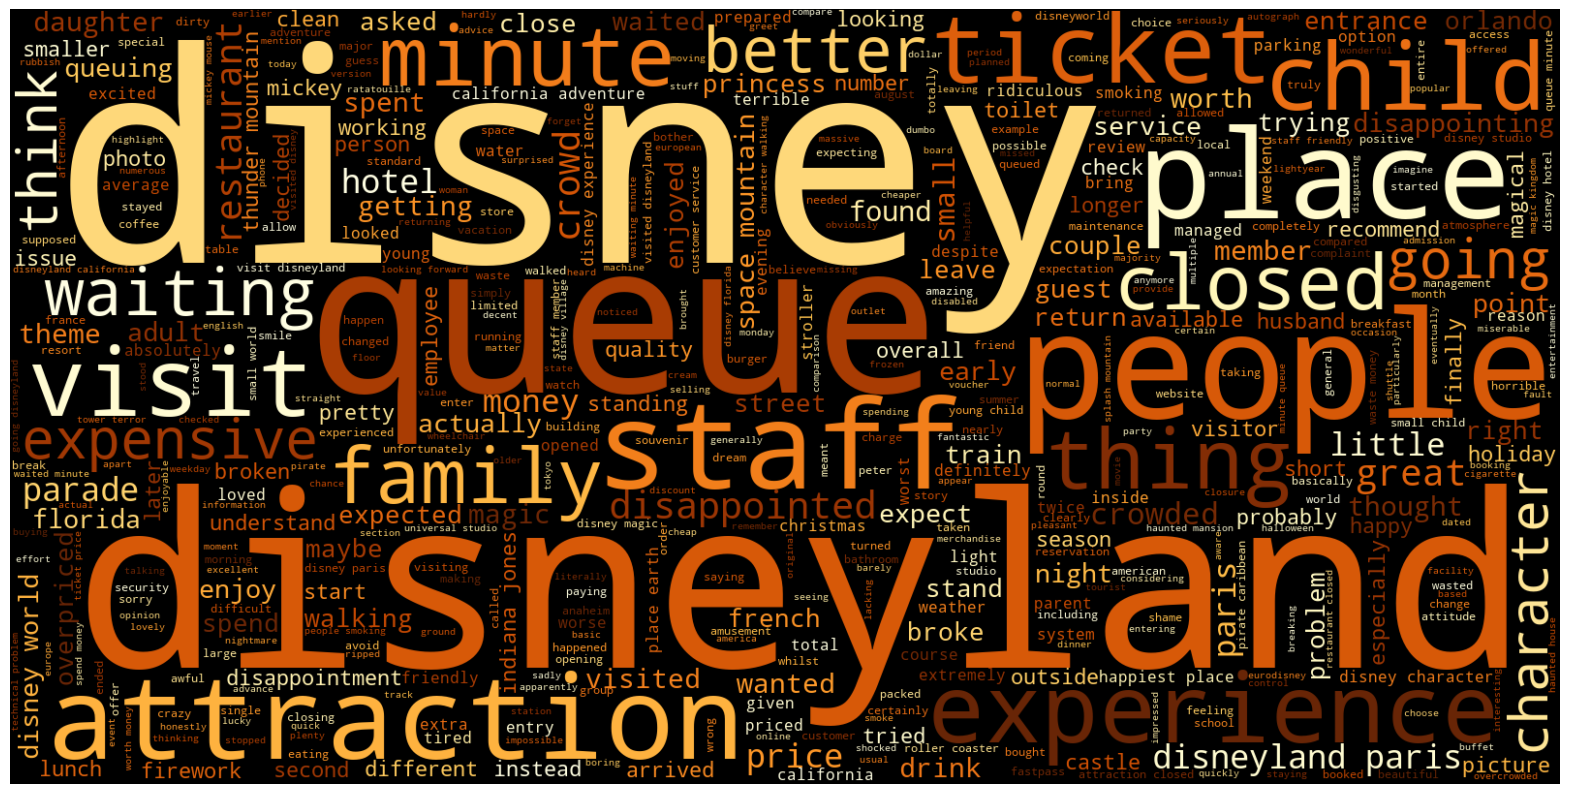

In [48]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
              min_word_length=5,colormap="YlOrBr").generate(" ".join(data[data.Rating == 2].Review_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

# WordCloud for Rating 1

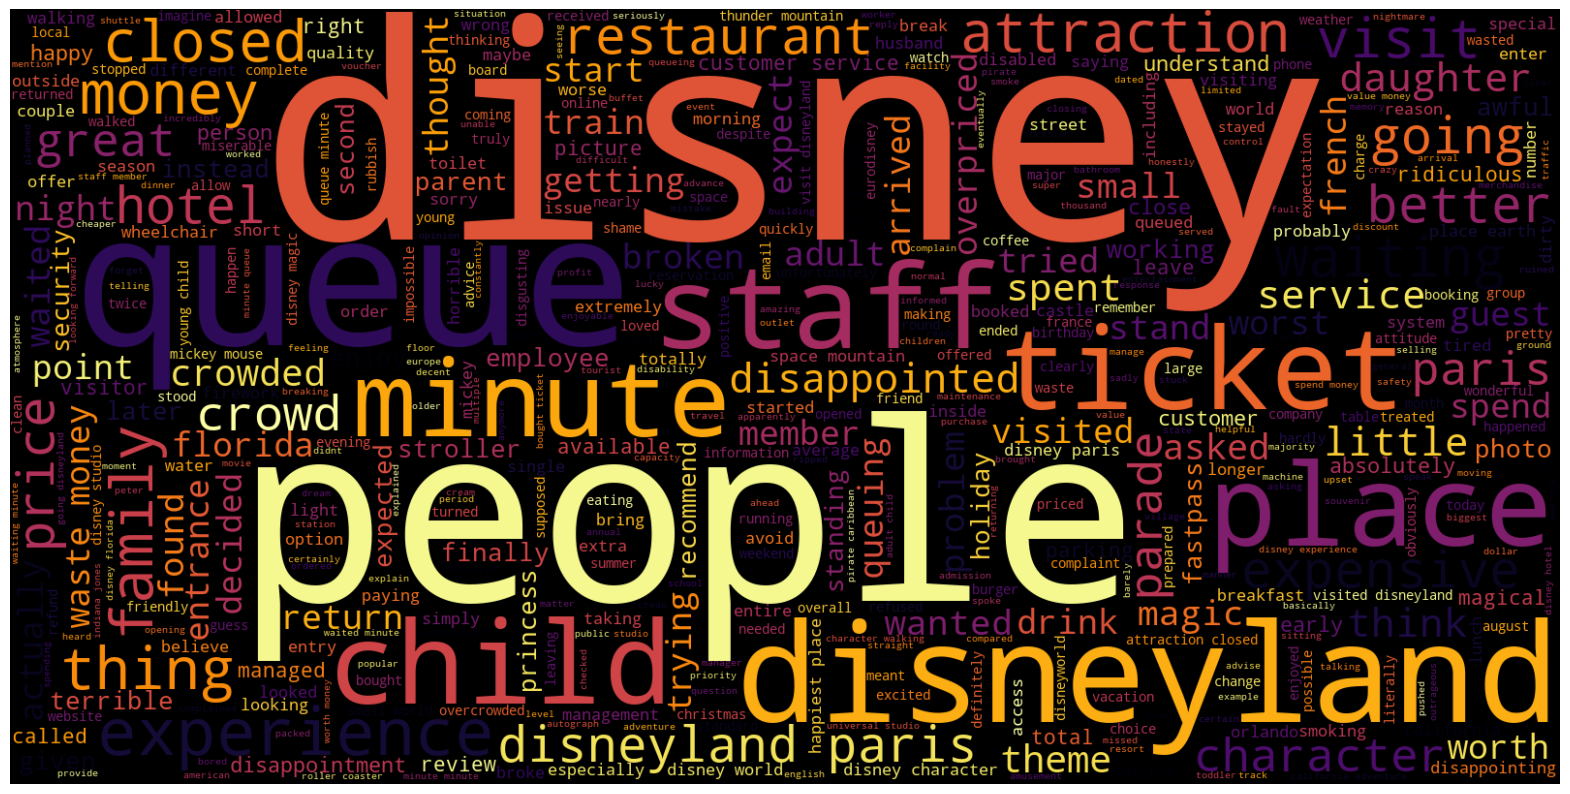

In [49]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
              min_word_length=5,colormap="inferno").generate(" ".join(data[data.Rating == 1].Review_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')